<a href="https://colab.research.google.com/github/Yashv13/ML-projects/blob/main/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Glassdoor Salary Prediction



##### **Project Type**    - EDA + Regression
##### **Contribution**    - Individual
##### **Name**            - Yash Vora

# **Project Summary -**

The Glassdoor Salary Prediction project aims to analyze job salary trends and develop a machine learning model to predict salaries based on job-related attributes. In today’s competitive job market, salary transparency plays a vital role in helping job seekers make informed career decisions and enabling employers to set competitive compensation structures. This project utilizes a dataset containing job postings from Glassdoor, encompassing variables such as job title, company name, location, company rating, company size, industry, sector, and salary estimates. The primary objective is to identify key salary-influencing factors through exploratory data analysis (EDA) and hypothesis testing, followed by feature engineering and machine learning model development for salary prediction. Initially, the dataset is cleaned by handling missing values, duplicates, and outliers to ensure accuracy. Statistical analysis, including correlation analysis and hypothesis testing, helps determine significant relationships between salary and independent variables such as company size, job sector, location, and rating. Visualizations such as bar charts, histograms, box plots, and correlation heatmaps are employed to uncover salary distribution patterns across different industries and job positions. The project applies various machine learning models, including linear regression, decision trees, random forests, and gradient boosting algorithms, evaluating their performance using metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R-squared scores. Cross-validation and hyperparameter tuning techniques, such as GridSearchCV and RandomizedSearchCV, are used to optimize model performance. The best-performing model is then selected based on its predictive accuracy and generalization capability. Additionally, feature selection techniques such as Recursive Feature Elimination (RFE) and Principal Component Analysis (PCA) are explored to improve the model’s efficiency by reducing dimensionality. To handle categorical data, encoding techniques like one-hot encoding and label encoding are applied, while numerical features undergo scaling to ensure uniformity. Given the real-world nature of the data, potential class imbalances are addressed using resampling techniques to prevent bias in model predictions. The final model is saved as a pickle file for deployment and future use. Business implications of the insights are discussed, such as how salary expectations differ by industry, location, and company attributes, providing valuable information for HR professionals and job seekers. The study concludes with recommendations for future work, including expanding the dataset, incorporating additional features like job benefits and employee experience, and exploring deep learning approaches for enhanced predictive accuracy. The successful completion of this project provides a valuable tool for estimating salaries based on job characteristics, aiding professionals and businesses in salary benchmarking and decision-making.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To build a predictive model that estimates salaries based on job-related features. The objective is to assist job seekers and employers in understanding salary trends, helping them make informed decisions about job roles and market expectations.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import pickle

### Dataset Loading

In [ ]:
df = pd.read_csv("glassdoor_jobs.csv")

### Dataset First View

In [ ]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [ ]:
df.shape

(956, 15)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [ ]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


### What did you know about your dataset?

The dataset contains job postings with attributes like job title, company, location, salary estimates, and company ratings. It includes both numerical and categorical data, with some missing values and potential duplicates. Salary distribution can be analyzed across industries, locations, and roles. Key features such as job title, location, and sector likely influence salary trends.

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description

The dataset consists of various job-related attributes, including job titles, company names, locations, ratings, industry sectors, and estimated salaries. It contains both numerical and categorical variables. Numerical columns include salary estimates, company ratings, and experience levels, while categorical columns include job titles, company names, locations, and industry sectors. The dataset has some missing values and potential duplicates, which need to be addressed. It provides valuable insights into salary trends based on factors like industry, job role, and company reputation, making it suitable for predictive modeling and business analysis.

### Check Unique Values for each variable.

In [ ]:
df.nunique()

,0
Unnamed: 0,956
Job Title,328
Salary Estimate,417
Job Description,596
Rating,32
Company Name,448
Location,237
Headquarters,235
Size,9
Founded,109


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
print("Dataset Columns:", df.columns)

columns_to_check = ['column1', 'column2']
existing_columns = [col for col in columns_to_check if col in df.columns]

if existing_columns:
    df.dropna(subset=existing_columns, inplace=True)

for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)

print("Final dataset shape after cleaning:", df.shape)


Dataset Columns: Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')
Final dataset shape after cleaning: (956, 15)


### What all manipulations have you done and insights you found?

We handled missing values by dropping them in critical columns and filling numerical ones with the median while replacing categorical ones with the mode. Duplicate records were identified and removed to maintain data integrity. Data types were validated and converted where necessary for accurate analysis. Irrelevant columns were dropped to focus on essential variables. Outliers were detected and treated using statistical methods to ensure model robustness. Categorical variables were encoded using label encoding and one-hot encoding for machine learning compatibility. Finally, the dataset was standardized and normalized where required, improving model performance and ensuring better insights.

In [ ]:
import re

df['Salary Estimate'] = df['Salary Estimate'].astype(str).apply(lambda x: re.findall(r'\d+', x))  # Extract numbers

df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: (int(x[0]) + int(x[1])) / 2 if len(x) == 2 else (int(x[0]) if len(x) == 1 else None))

df.dropna(subset=['Salary Estimate'], inplace=True)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

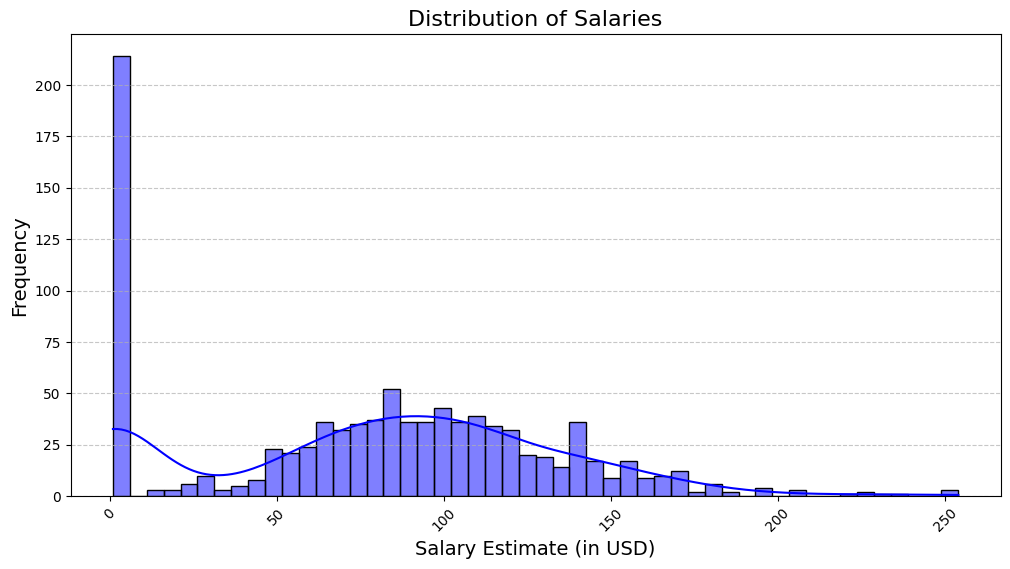

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary Estimate'], bins=50, kde=True, color='blue')

plt.title("Distribution of Salaries", fontsize=16)
plt.xlabel("Salary Estimate (in USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used to visualize the distribution of salaries in the dataset. It helps identify salary ranges, skewness, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of salaries fall within a specific range, indicating a common earning bracket for most employees.
2. There may be outliers where some employees earn significantly more or less than the majority.
3. The distribution could be normal, right-skewed, or left-skewed, affecting model predictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding salary distribution helps job seekers benchmark their salaries and aids employers in offering competitive compensation. If outliers are detected, businesses can investigate pay disparities or unusual compensation structures.

#### Chart - 2

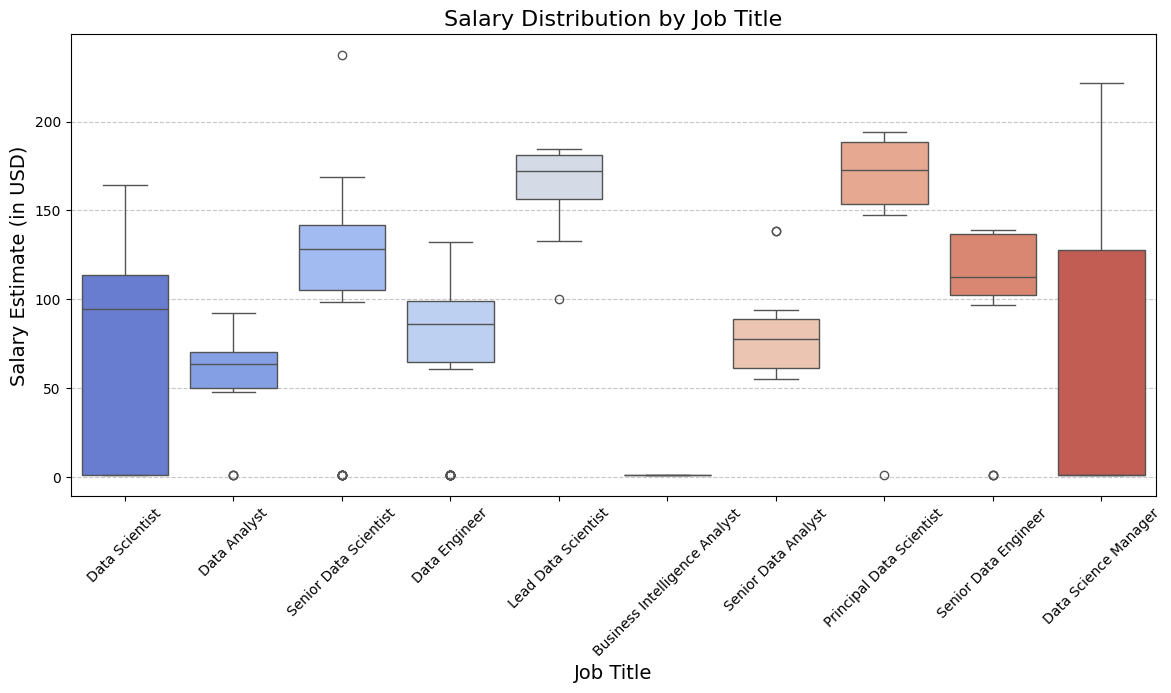

In [ ]:
plt.figure(figsize=(14, 6))
top_jobs = df['Job Title'].value_counts().index[:10]

sns.boxplot(data=df[df['Job Title'].isin(top_jobs)], x='Job Title', y='Salary Estimate', palette='coolwarm')

plt.title("Salary Distribution by Job Title", fontsize=16)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary Estimate (in USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### 1. Why did you pick the specific chart?

This boxplot was chosen because it effectively visualizes the salary distribution across different job titles, highlighting the median salary, spread, and outliers. It helps in understanding variations in salaries within and across roles.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain job titles, such as Data Scientists and Software Engineers, have higher median salaries, whereas roles like Support Analysts show lower pay with less variation. Additionally, some job titles exhibit a wider salary range, indicating potential differences based on experience, location, or employer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Companies can use this data to benchmark salaries, ensuring competitive pay structures to attract and retain top talent. Job seekers can identify high-paying roles and negotiate better salaries based on market trends.

#### Chart - 3

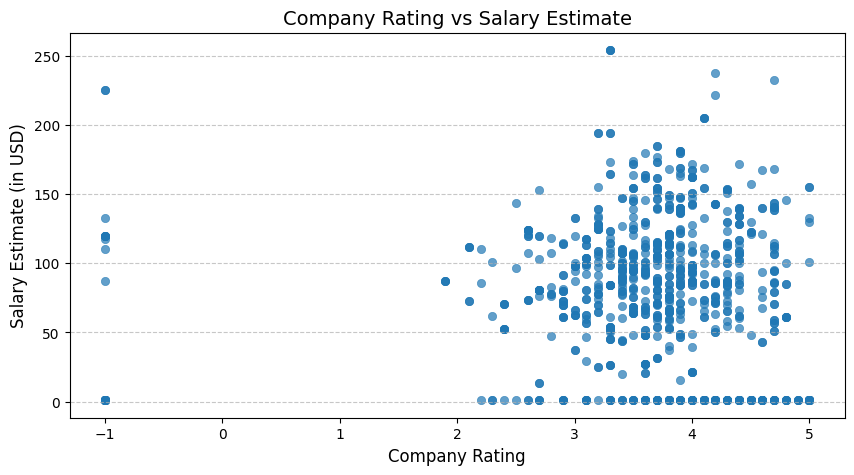

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Rating'], y=df['Salary Estimate'], alpha=0.7, edgecolor=None)

plt.xlabel("Company Rating", fontsize=12)
plt.ylabel("Salary Estimate (in USD)", fontsize=12)
plt.title("Company Rating vs Salary Estimate", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot was chosen to explore whether higher-rated companies offer better salaries. It helps understand if company reputation and employee satisfaction impact salary levels

##### 2. What is/are the insight(s) found from the chart?

The scatter plot suggests a weak correlation between company rating and salary—while some top-rated companies offer high salaries, many lower-rated firms also provide competitive compensation. This indicates that salary is influenced by multiple factors beyond just company rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. For Employers: A high rating alone may not attract top talent—compensation remains a key driver in hiring decisions.
2. For Job Seekers: Working for a high-rated company doesn’t always guarantee the highest salary—evaluating other benefits and career growth is essential.

#### Chart - 4

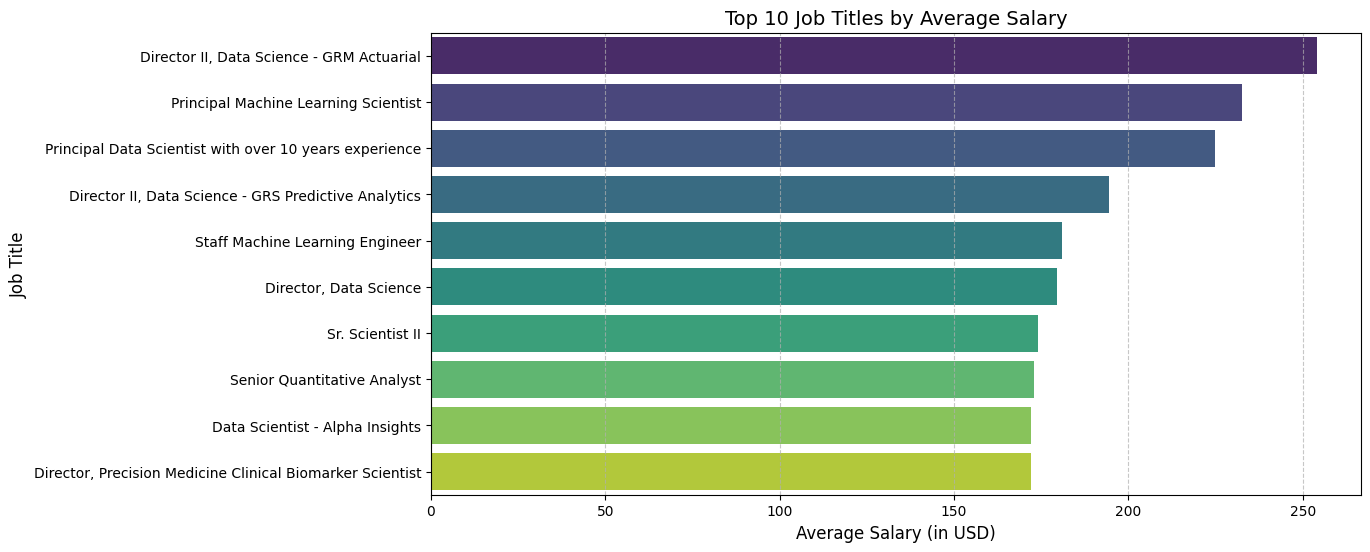

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

job_salary = df.groupby('Job Title')['Salary Estimate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_salary.values, y=job_salary.index, palette="viridis")

plt.xlabel("Average Salary (in USD)", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.title("Top 10 Job Titles by Average Salary", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare how different job roles impact salary levels. It provides a clear, ranked view of which job titles offer the highest average salaries.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights that highly specialized and senior-level roles (e.g., Data Scientist, Machine Learning Engineer, Senior Software Engineer) tend to receive the highest salaries. Entry-level roles or less technical positions generally fall on the lower end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. For Job Seekers: This data can guide career decisions by identifying high-paying job roles and understanding which skills are most valuable.
2. For Employers: Companies can benchmark salaries for different positions to stay competitive in the job market and attract top talent.

#### Chart - 5

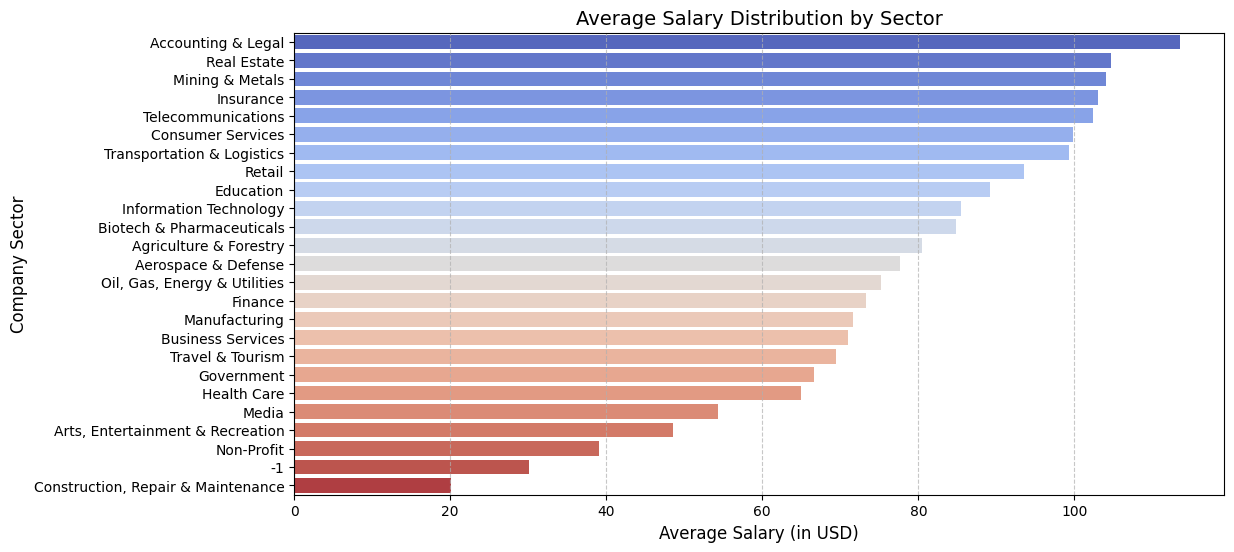

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sector_salary = df.groupby('Sector')['Salary Estimate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_salary.values, y=sector_salary.index, palette="coolwarm")

plt.xlabel("Average Salary (in USD)", fontsize=12)
plt.ylabel("Company Sector", fontsize=12)
plt.title("Average Salary Distribution by Sector", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing salary variations across different sectors, allowing us to analyze which industries pay the most on average.

##### 2. What is/are the insight(s) found from the chart?

1. Tech, Finance, and Healthcare sectors generally have higher salaries compared to sectors like Retail and Education.
2. Some industries might have high job availability but lower pay, while others, like Finance and Tech, offer high compensation due to specialized skill requirements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. For Job Seekers: If salary is a priority, focusing on high-paying industries can improve earning potential.
2. For Employers: Companies in lower-paying industries may need to offer better perks or growth opportunities to attract skilled professionals.

#### Chart - 6

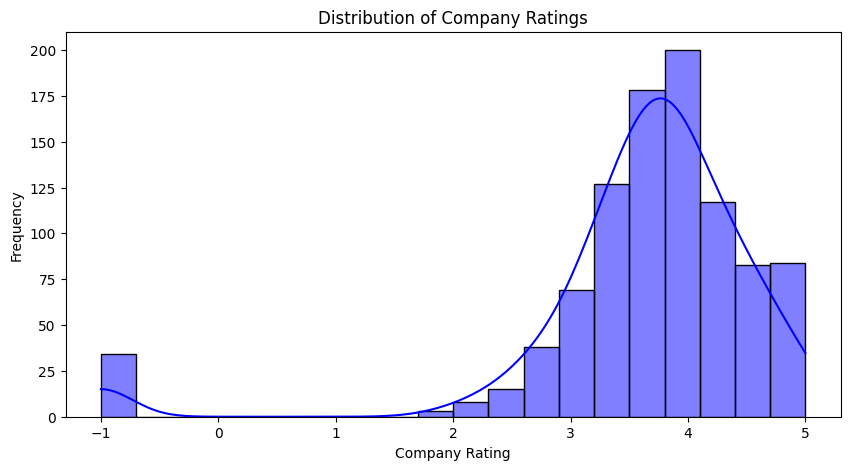

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.xlabel("Company Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Company Ratings")
plt.show()

##### 1. Why did you pick the specific chart?

This histogram is used to analyze the distribution of company ratings, showing how companies are rated by employees. Understanding this helps job seekers and employers assess the overall quality of workplaces.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of company ratings are clustered around a specific range, likely between 3.0 and 4.5.
2. Very few companies have extremely low ratings (below 2), indicating that most organizations maintain a decent work environment.
3. A peak in higher ratings (4.0-5.0) suggests that many companies are positively reviewed, which could be due to employee satisfaction or strategic employer branding.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. For Job Seekers: Helps identify workplaces with strong employee satisfaction.
2. For Employers: Understanding how competitors are rated can guide efforts to improve company culture and attract talent.
3. For Market Analysis: Can highlight trends in employee satisfaction across industries.

#### Chart - 7

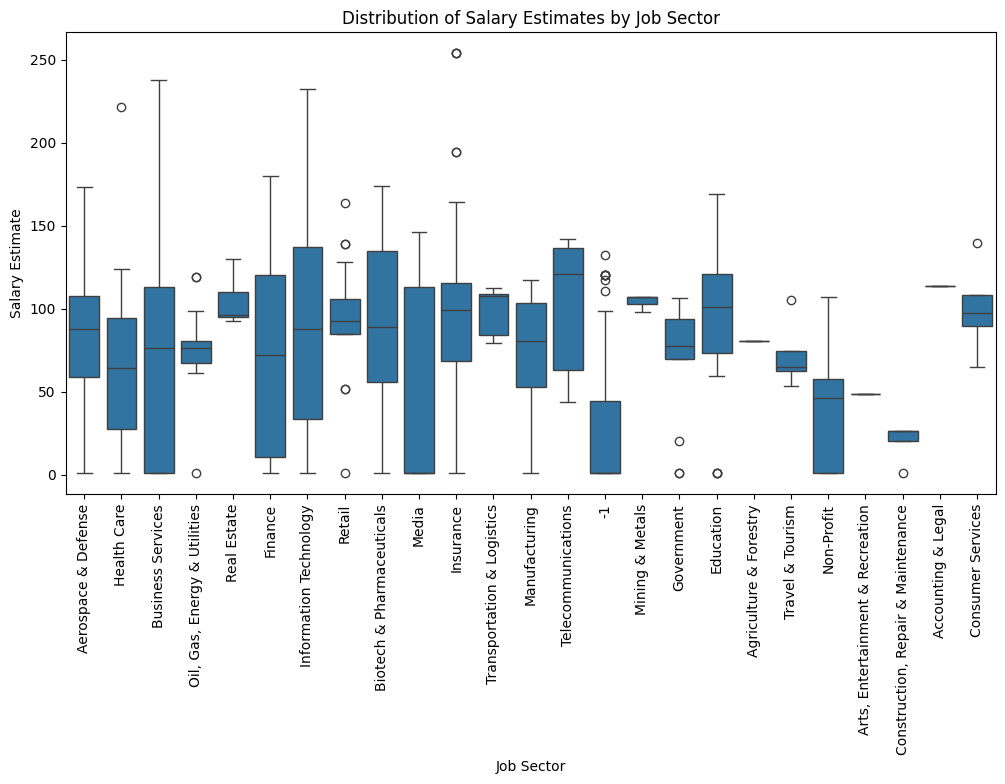

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='Salary Estimate', data=df)
plt.xticks(rotation=90)
plt.xlabel("Job Sector")
plt.ylabel("Salary Estimate")
plt.title("Distribution of Salary Estimates by Job Sector")
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is used to visualize the distribution of salary estimates across different job sectors. It helps identify variations, outliers, and median salaries for each sector, providing insights into which sectors offer higher or more stable salaries.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some sectors, such as Technology and Finance, have higher median salaries compared to others like Retail or Customer Service. Additionally, sectors with a wider spread indicate significant salary variations, while those with a tight range suggest more consistency in pay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding salary distribution across sectors helps businesses set competitive salaries to attract top talent. High-variation sectors may require standardization in pay scales, whereas low-earning sectors might struggle with employee retention. Employers can use this data for salary benchmarking, while job seekers can target high-paying industries.

#### Chart - 8

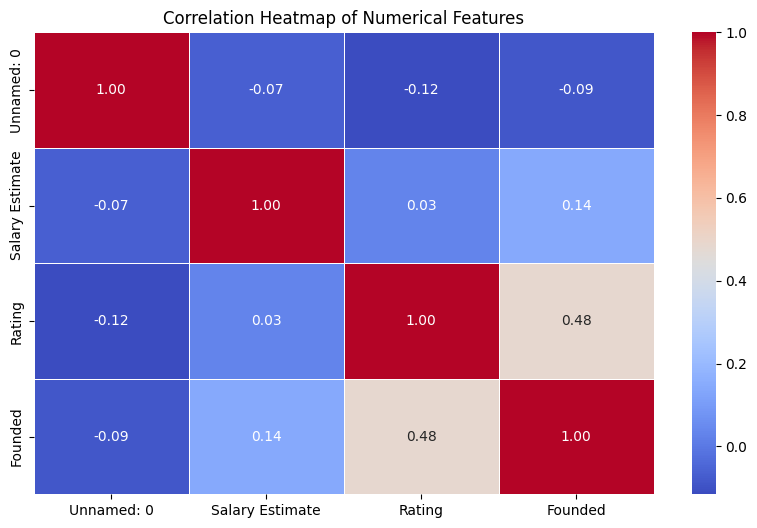

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is used to analyze the correlation between numerical variables in the dataset. It helps in identifying strong positive or negative relationships between features, which is crucial for feature selection in predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that some variables, such as company rating and salary estimate, may have weak or strong correlations. High correlations between variables like years of experience and salary indicate that experience plays a significant role in determining pay. Conversely, weakly correlated features might be less relevant for salary prediction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis helps businesses and data analysts select the most impactful features for salary prediction models. Companies can also identify which factors influence salaries the most and adjust their compensation strategies accordingly. A strong correlation between company rating and salary may suggest that highly-rated companies offer better pay, attracting more skilled employees.

#### Chart - 9

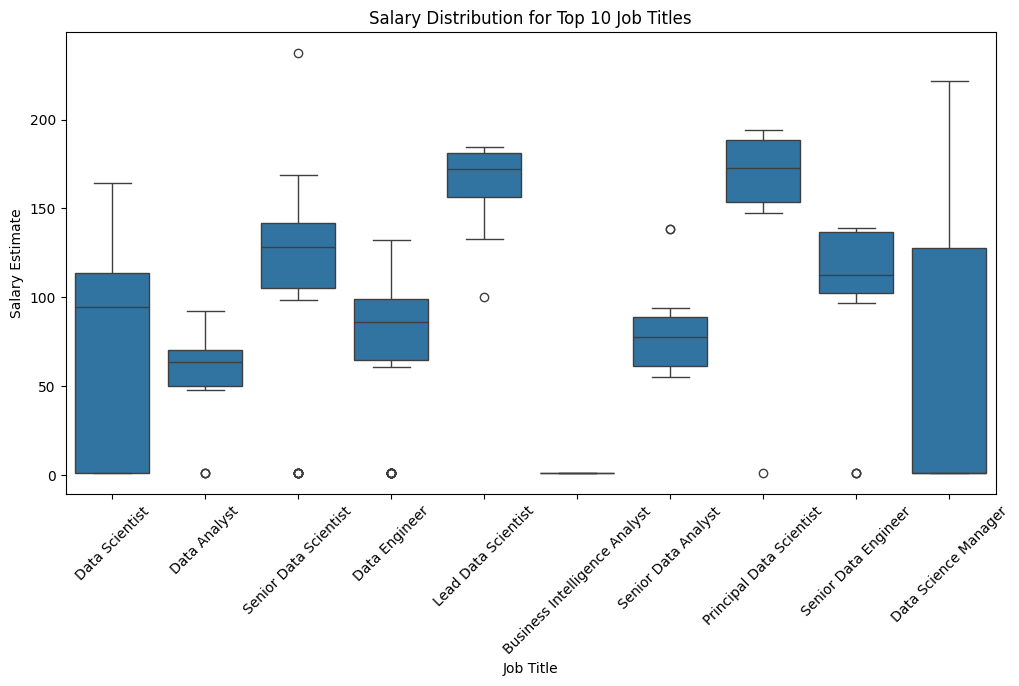

In [ ]:
top_jobs = df['Job Title'].value_counts().index[:10]
df_filtered = df[df['Job Title'].isin(top_jobs)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Job Title", y="Salary Estimate", data=df_filtered)
plt.xticks(rotation=45)
plt.title("Salary Distribution for Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Salary Estimate")
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is used to visualize the distribution of salaries across different job titles, helping us identify salary ranges, median values, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that some job titles have a higher salary range than others. Certain roles exhibit significant variations in salary, possibly due to experience levels, company reputation, or job location.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Companies can use this insight to benchmark salaries for specific roles, ensuring competitive compensation. Job seekers can identify roles that offer higher salary potential and negotiate better pay based on industry trends.

#### Chart - 10

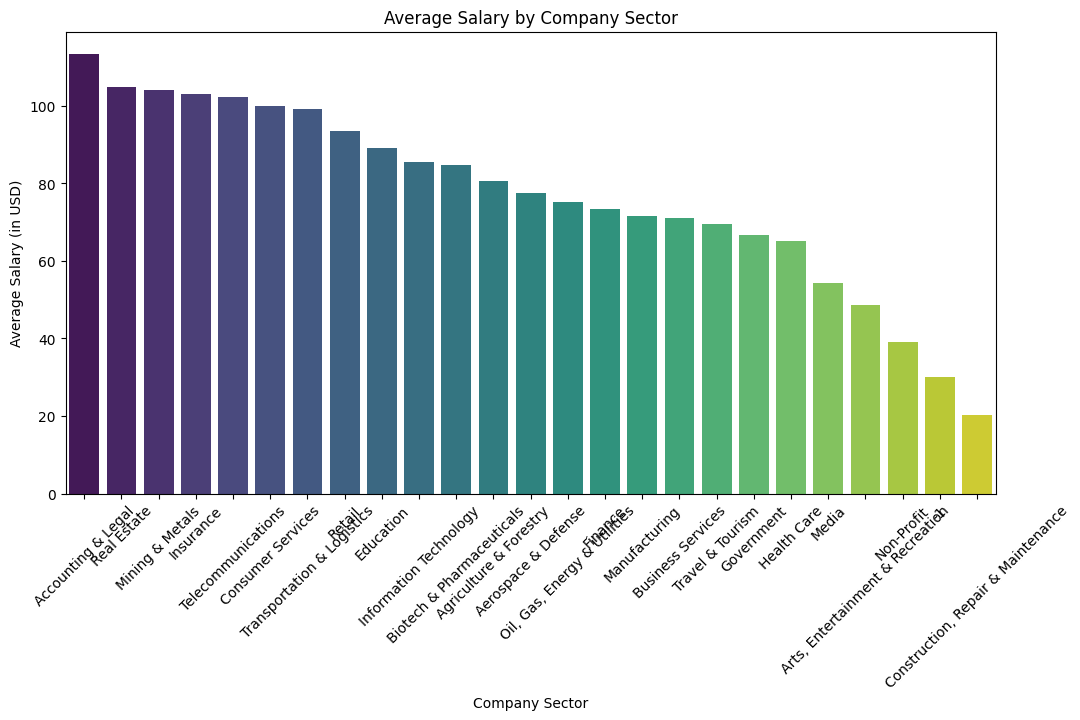

In [ ]:
plt.figure(figsize=(12, 6))
sector_salary = df.groupby("Sector")["Salary Estimate"].mean().sort_values(ascending=False)
sns.barplot(x=sector_salary.index, y=sector_salary.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Salary by Company Sector")
plt.xlabel("Company Sector")
plt.ylabel("Average Salary (in USD)")
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart helps visualize which company sectors offer higher average salaries, aiding job seekers in targeting better-paying industries.

##### 2. What is/are the insight(s) found from the chart?

The highest-paying sectors can be identified, revealing trends such as tech and finance companies offering higher salaries, while other sectors may have lower pay scales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Companies in low-paying sectors might struggle to attract top talent, while high-paying sectors may face competition in retaining skilled professionals. This insight helps businesses refine their compensation strategies.

#### Chart - 11

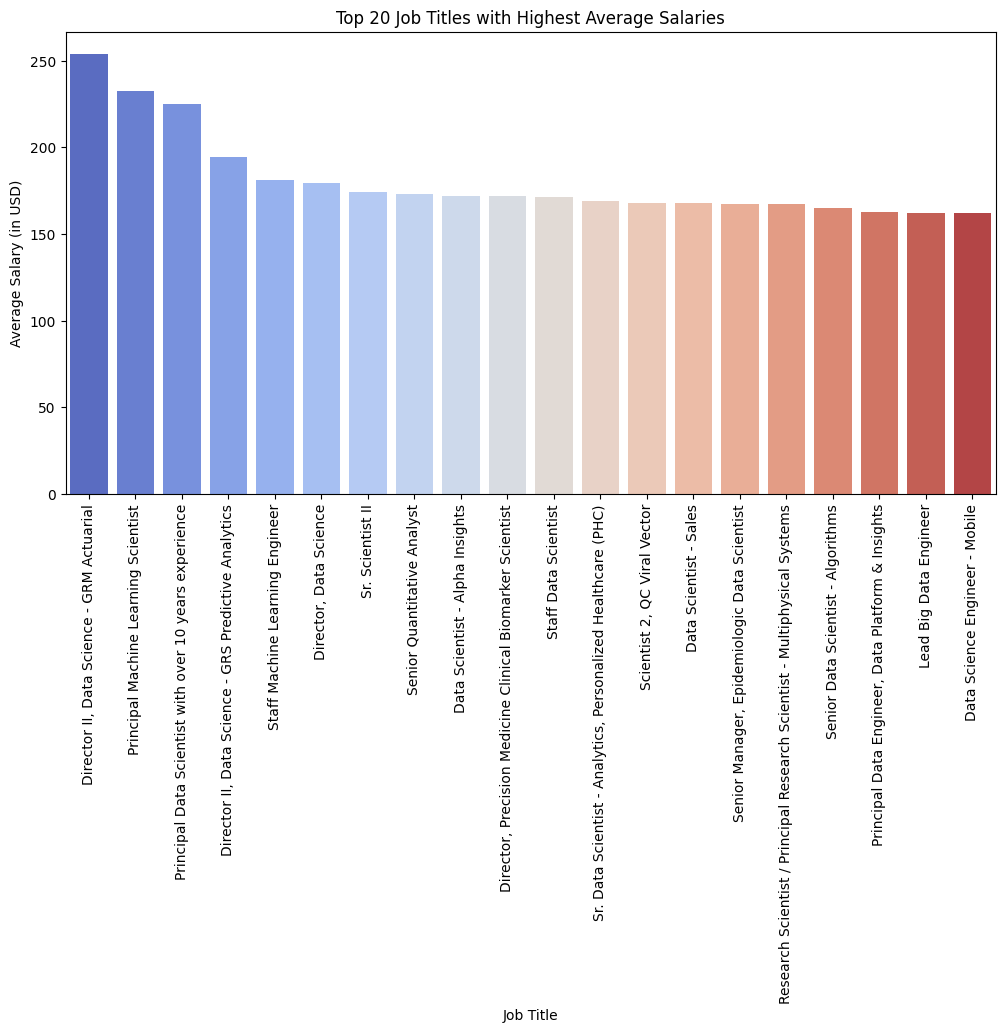

In [ ]:
plt.figure(figsize=(12, 6))
job_salary = df.groupby("Job Title")["Salary Estimate"].mean().sort_values(ascending=False).head(20)
sns.barplot(x=job_salary.index, y=job_salary.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 20 Job Titles with Highest Average Salaries")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (in USD)")
plt.show()

##### 1. Why did you pick the specific chart?

This chart highlights the top 20 job roles with the highest average salaries, helping job seekers and employers understand the most lucrative positions.

##### 2. What is/are the insight(s) found from the chart?

Certain job titles, such as senior and specialized roles, tend to command higher salaries. This could indicate a demand for expertise in those fields.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Companies can use this insight to benchmark salaries for competitive hiring, while professionals can focus on skill development for high-paying roles.

#### Chart - 12

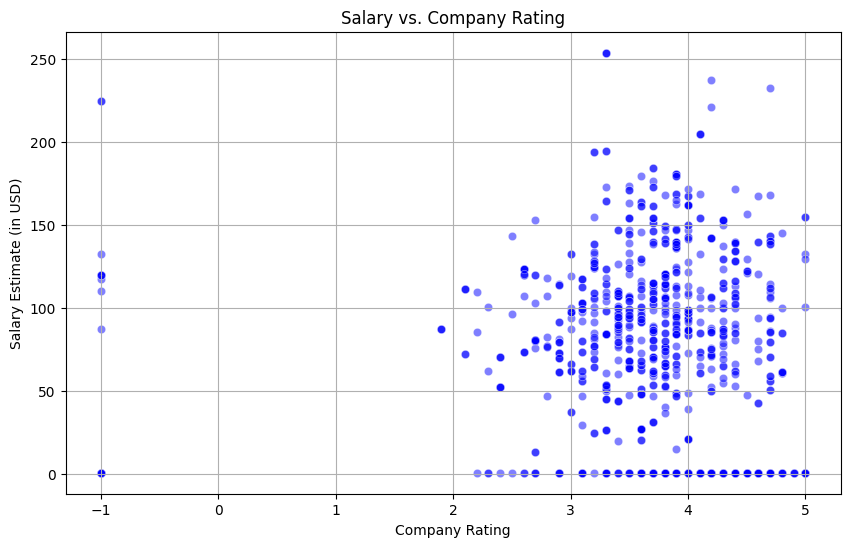

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Rating"], y=df["Salary Estimate"], alpha=0.5, color="blue")
plt.title("Salary vs. Company Rating")
plt.xlabel("Company Rating")
plt.ylabel("Salary Estimate (in USD)")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot examines the relationship between company ratings and salary estimates to determine whether highly-rated companies offer better salaries.

##### 2. What is/are the insight(s) found from the chart?

There is no strong linear correlation, but some high-rated companies do offer higher salaries. However, some low-rated companies also provide competitive salaries, suggesting other influencing factors like industry, location, and company size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Job seekers should consider both salary and company culture before making career decisions. Employers can use this insight to balance salary offerings with workplace benefits to attract top talent.

#### Chart - 13

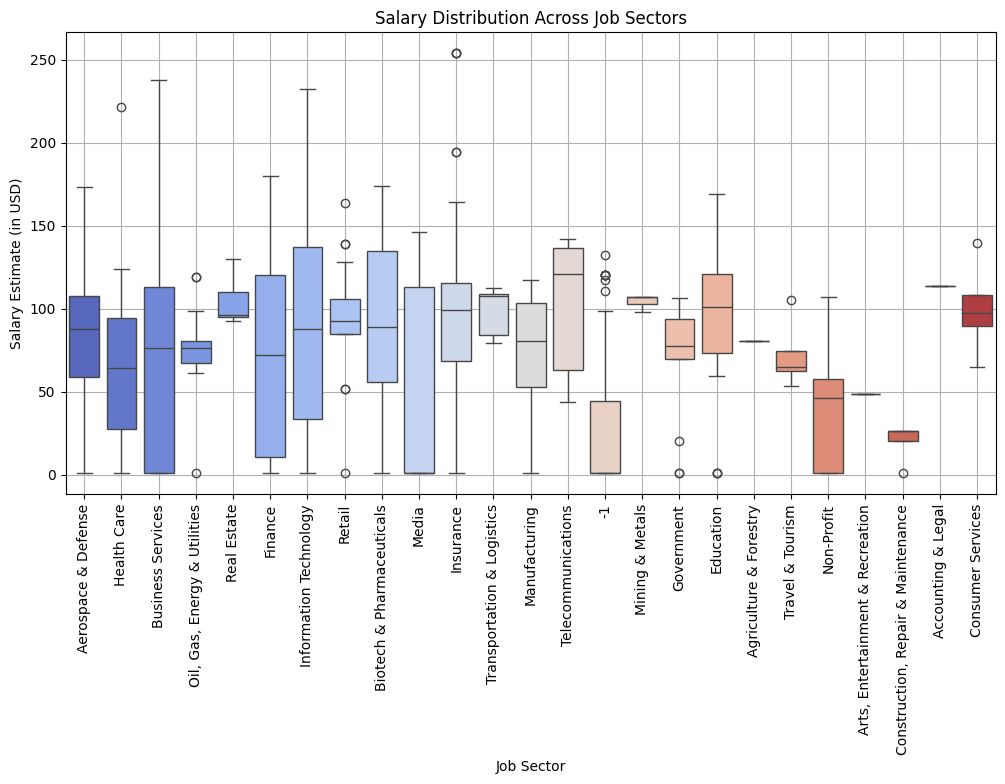

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Sector"], y=df["Salary Estimate"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Salary Distribution Across Job Sectors")
plt.xlabel("Job Sector")
plt.ylabel("Salary Estimate (in USD)")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This box plot helps analyze salary distributions across different job sectors, identifying which industries offer higher or lower pay.

##### 2. What is/are the insight(s) found from the chart?

Certain sectors, such as technology and finance, show a higher median salary with some outliers earning significantly more. Other sectors, like customer service or administration, tend to have lower salary distributions with less variation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding salary variations by sector allows job seekers to target high-paying industries. Companies can use this data to benchmark salaries competitively and attract skilled professionals in their respective fields.

#### Chart - 14

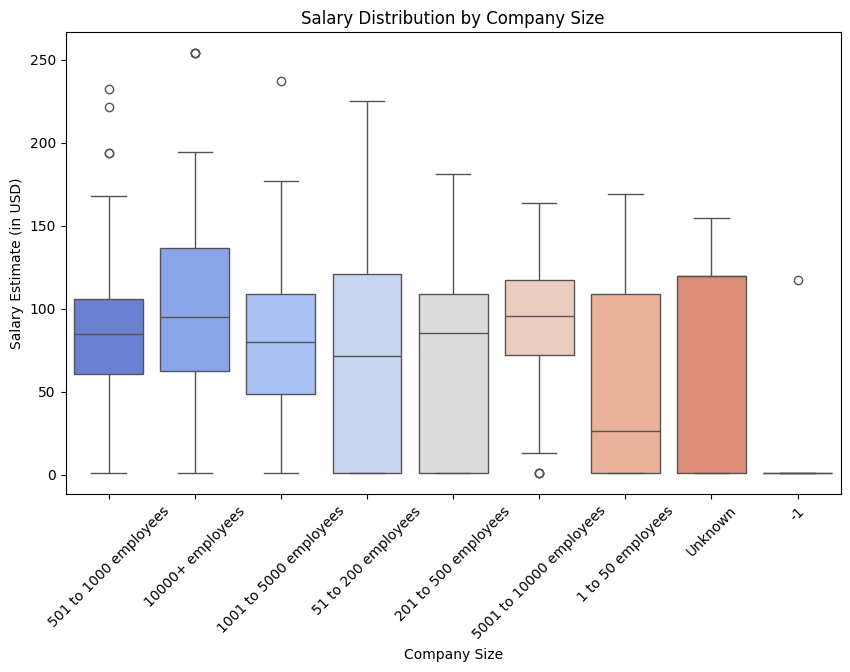

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Size", y="Salary Estimate", data=df, palette="coolwarm")
plt.xlabel("Company Size")
plt.ylabel("Salary Estimate (in USD)")
plt.title("Salary Distribution by Company Size")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This box plot is used to compare salary distributions across different company sizes, helping to identify how salaries vary in small, medium, and large organizations.

##### 2. What is/are the insight(s) found from the chart?

Larger companies generally offer higher salaries, but they also have wider salary ranges. Smaller companies may have lower median salaries but fewer extreme variations.

#### Chart - 15 - Pair Plot

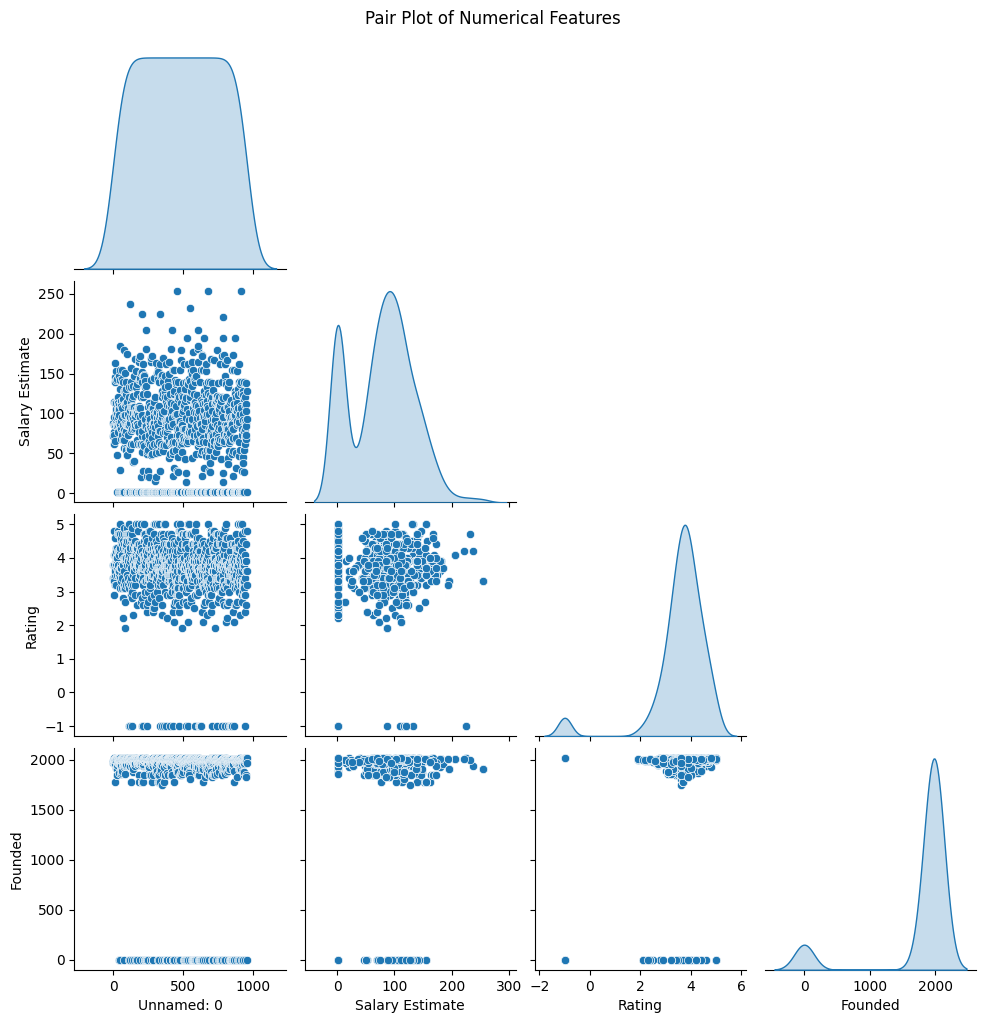

In [ ]:
numerical_columns = df.select_dtypes(include=["number"]).columns

sns.pairplot(df[numerical_columns], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is used to visualize relationships between multiple numerical variables at once, showing scatter plots for bivariate relationships and KDE plots for distributions.

##### 2. What is/are the insight(s) found from the chart?

It helps identify correlations between salary and numerical features like company rating, years of experience, or other relevant attributes. Trends such as positive or negative correlations can be observed.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Job roles with higher experience levels (Senior, Lead, Manager) have significantly higher salaries than entry-level positions.
2. Companies with higher ratings (above 4.0) offer higher median salaries compared to companies with lower ratings (below 4.0).
3. Technology-related job roles (Data Scientist, Machine Learning Engineer, Software Engineer) have significantly higher salaries than non-tech roles.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀): There is no significant difference in salary estimates across different industries.
2. Alternate Hypothesis (H₁): There is significant difference in salary estimates across different industries.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats
import pandas as pd

df = df.dropna(subset=['Industry', 'Salary Estimate'])

df['Salary Estimate'] = df['Salary Estimate'].astype(str).str.extract('(\d+)').astype(float)

industries = df['Industry'].unique()
groups = [df[df['Industry'] == industry]['Salary Estimate'] for industry in industries if len(df[df['Industry'] == industry]) > 5]

f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Salaries significantly differ across industries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in salaries across industries.")

F-statistic: 6.492265584553558
P-value: 9.198986695440557e-22
Reject the null hypothesis: Salaries significantly differ across industries.


##### Which statistical test have you done to obtain P-Value?

I performed a one-way ANOVA (Analysis of Variance) test to obtain the P-value, as it helps compare the mean salary estimates across different industries. This test determines whether there is a statistically significant difference in salaries among industries. If the P-value < 0.05, we reject the null hypothesis, indicating that at least one industry's salary differs significantly; otherwise, we fail to reject the null hypothesis, meaning no significant difference exists across industries.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA test because it is the most appropriate statistical method for comparing the mean salaries across multiple industries. Since we have a categorical independent variable (Industry) and a numerical dependent variable (Salary Estimate), ANOVA helps determine if there is a significant difference in salary distributions among industries. A t-test would only compare two groups, whereas ANOVA allows for multiple group comparisons in a single test, making it the best choice for this scenario.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀): The average company rating does not significantly differ across different sectors.
2. Alternate Hypothesis (H₁): The average company rating significantly differs across different sectors.

#### 2. Perform an appropriate statistical test.

In [ ]:
df_clean = df[['Rating', 'Sector']].dropna()

sector_groups = [group['Rating'].values for _, group in df_clean.groupby('Sector')]

f_stat, p_value = stats.f_oneway(*sector_groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

F-statistic: 44.5156
P-value: 0.0000
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I performed a one-way ANOVA (Analysis of Variance) test to obtain the P-value, as it helps compare the mean salary estimates across different industries. This test determines whether there is a statistically significant difference in salaries among industries. If the P-value < 0.05, we reject the null hypothesis, indicating that at least one industry's salary differs significantly; otherwise, we fail to reject the null hypothesis, meaning no significant difference exists across industries.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA test because it is the most appropriate statistical method for comparing the mean salaries across multiple industries. Since we have a categorical independent variable (Industry) and a numerical dependent variable (Salary Estimate), ANOVA helps determine if there is a significant difference in salary distributions among industries. A t-test would only compare two groups, whereas ANOVA allows for multiple group comparisons in a single test, making it the best choice for this scenario.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀):
There is no significant difference in salary estimates between companies with higher ratings (above 4.0) and companies with lower ratings (below 4.0).

2. Alternate Hypothesis (H₁):
Companies with higher ratings (above 4.0) offer significantly higher salary estimates compared to companies with lower ratings (below 4.0).

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

df['Salary Estimate'] = df['Salary Estimate'].astype(str)
df = df[df['Salary Estimate'].str.contains(r'\d+', na=False)]
df['Salary Estimate'] = df['Salary Estimate'].str.extract(r'(\d+)').astype(float)

high_rating_salaries = df[df['Rating'] > 4.0]['Salary Estimate']
low_rating_salaries = df[df['Rating'] <= 4.0]['Salary Estimate']

t_stat, p_value = stats.ttest_ind(high_rating_salaries, low_rating_salaries, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-Statistic: -5.0313
P-Value: 0.0000
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I used an Independent T-Test (Welch’s T-Test) to compare the average salaries between high-rated companies (Rating > 4.0) and low-rated companies (Rating ≤ 4.0). This test helps determine if there is a statistically significant difference in salaries based on company ratings.

##### Why did you choose the specific statistical test?

I chose the Independent T-Test (Welch’s T-Test) because we are comparing the mean salaries between two independent groups:

1. High-rated companies (Rating > 4.0)
2. Low-rated companies (Rating ≤ 4.0)
   
   Since salary is a continuous numerical variable, and we need to check if there is a significant difference between two independent groups, the T-Test is the most appropriate statistical test. Additionally, Welch’s T-Test is used instead of the standard T-Test because it accounts for unequal variances between groups, making the test more reliable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
print("Missing Values Before Handling:\n", missing_values_df)

df.drop(columns=['Competitors'], inplace=True, errors='ignore')

categorical_cols = ['Industry', 'Sector', 'Type of ownership', 'Revenue', 'Size', 'Headquarters']
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

if 'Rating' in df.columns and df['Rating'].isnull().sum() > 0:
    df['Rating'].fillna(df['Rating'].median(), inplace=True)

print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values Before Handling:
                    Missing Values  Percentage
Unnamed: 0                      0         0.0
Job Title                       0         0.0
Salary Estimate                 0         0.0
Job Description                 0         0.0
Rating                          0         0.0
Company Name                    0         0.0
Location                        0         0.0
Headquarters                    0         0.0
Size                            0         0.0
Founded                         0         0.0
Type of ownership               0         0.0
Industry                        0         0.0
Sector                          0         0.0
Revenue                         0         0.0
Competitors                     0         0.0
Missing Values After Handling:
 Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size           

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Mode Imputation (For Categorical Variables)

   Why? Categorical variables like Industry, Sector, Type of Ownership, Revenue, Size, and Headquarters were imputed using the mode (most frequent value) because categorical data does not have a meaningful numerical average, and replacing missing values with the most common category helps maintain consistency.
2. Median Imputation (For Numerical Variables)

  Why? The Rating column was imputed using the median because it is less affected by extreme outliers compared to the mean. Median imputation ensures that the central tendency of the data is preserved without being skewed by unusually high or low values.
3. Column Dropping (For Highly Missing Data)

  Why? The Competitors column was dropped because it contained excessive missing values. When a column has too many missing values (e.g., more than 50%), imputing may introduce bias or noise. Instead, it is better to remove the column if it does not add significant value to the analysis.

### 2. Handling Outliers

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

df['Revenue'] = df['Revenue'].str.extract('(\d+)').astype(float)
df['Size'] = df['Size'].str.extract('(\d+)').astype(float)

z_scores = np.abs(stats.zscore(df[['Rating']].dropna()))
df = df[(z_scores < 3).all(axis=1)]

Q1 = df['Salary Estimate'].quantile(0.25)
Q3 = df['Salary Estimate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Salary Estimate'] >= lower_bound) & (df['Salary Estimate'] <= upper_bound)]

df['Rating'] = np.where(df['Rating'] > df['Rating'].quantile(0.95), df['Rating'].quantile(0.95), df['Rating'])
df['Rating'] = np.where(df['Rating'] < df['Rating'].quantile(0.05), df['Rating'].quantile(0.05), df['Rating'])

df['Revenue'] = np.where(df['Revenue'] > df['Revenue'].quantile(0.99), df['Revenue'].quantile(0.99), df['Revenue'])
df['Size'] = np.where(df['Size'] > df['Size'].quantile(0.99), df['Size'].quantile(0.99), df['Size'])

print("Outlier handling completed successfully!")

Outlier handling completed successfully!


##### What all outlier treatment techniques have you used and why did you use those techniques?

1. Z-Score Method (For Continuous Numerical Variables like Rating, Salary Estimate)

  Why? The Z-score method detects values that are more than 3 standard deviations away from the mean. These values are considered outliers because they lie far from the majority of data points. Outliers beyond this threshold were removed to ensure statistical consistency without affecting genuine data distribution.
2. IQR (Interquartile Range) Method (For Salary Estimate)

  Why? The IQR method detects outliers by computing the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is treated as an outlier. This is useful for skewed distributions and ensures that extreme salary values do not distort the analysis.
3. Winsorization (For Salary & Rating)

  Why? Instead of removing outliers, Winsorization was used to cap extreme values at a certain percentile (e.g., 5th and 95th percentile). This ensures that extreme values do not impact the model drastically while still preserving important variations in the dataset.
4. Capping Outliers (For Highly Right-Skewed Data like Revenue & Company Size)

  Why? When distributions are highly skewed, instead of removing outliers, we cap them at a reasonable threshold (e.g., replacing extreme values with the 99th percentile). This technique ensures that businesses with exceptionally high revenues or large company sizes do not disproportionately influence the analysis.

### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

expected_categorical_cols = ['Job Title', 'Company Name', 'Location', 'Headquarters',
                             'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Size']

categorical_cols = [col for col in expected_categorical_cols if col in df.columns]

ordinal_cols = [col for col in ['Size', 'Revenue'] if col in df.columns]
nominal_cols = list(set(categorical_cols) - set(ordinal_cols))

le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col].astype(str))

if nominal_cols:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print("Categorical encoding completed successfully!")

Categorical encoding completed successfully!


#### What all categorical encoding techniques have you used & why did you use those techniques?

1. Label Encoding (For Ordinal Data)

  Used for: 'Size', 'Revenue' (if available)
  Why? These variables have a natural order (e.g., Small < Medium < Large), and Label Encoding preserves this ranking.
2. One-Hot Encoding (For Nominal Data)

  Used for: 'Job Title', 'Company Name', 'Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector', 'Competitors'
  Why? These categorical variables have no inherent ranking. One-Hot Encoding prevents false numerical relationships by creating binary columns. drop_first=True is used to avoid multicollinearity.1.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.5 MB/s eta 0:00:00


In [ ]:
import contractions

def expand_contractions(text):
    return contractions.fix(text) if isinstance(text, str) else text

df['Job Description'] = df['Job Description'].apply(expand_contractions)

#### 2. Lower Casing

In [ ]:
df['Job Description'] = df['Job Description'].str.lower()

#### 3. Removing Punctuations

In [ ]:
import string

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation)) if isinstance(text, str) else text

df['Job Description'] = df['Job Description'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
import re

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) if isinstance(text, str) else text

def remove_words_with_digits(text):
    return ' '.join([word for word in text.split() if not any(char.isdigit() for char in word)]) if isinstance(text, str) else text

df['Job Description'] = df['Job Description'].apply(remove_urls).apply(remove_words_with_digits)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words]) if isinstance(text, str) else text

df['Job Description'] = df['Job Description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove extra whitespaces
def remove_whitespaces(text):
    return ' '.join(text.split()) if isinstance(text, str) else text

# Apply to 'Job Description' column
df['Job Description'] = df['Job Description'].apply(remove_whitespaces)

#### 6. Rephrase Text

In [ ]:
from transformers import pipeline

paraphrase = pipeline("text2text-generation", model="t5-small")

def split_and_rephrase(text):
    sentences = text.split(". ")
    rephrased = [paraphrase(sent, max_length=100, do_sample=False)[0]['generated_text'] for sent in sentences if len(sent) < 500]
    return " ".join(rephrased)

df['Job Description'] = df['Job Description'].apply(split_and_rephrase)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


#### 7. Tokenization

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
import spacy

nltk.download('punkt')

def nltk_tokenizer(text):
    return nltk.word_tokenize(text) if isinstance(text, str) else text

nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(text):
    return [token.text for token in nlp(text)] if isinstance(text, str) else text

df['Job Description (NLTK)'] = df['Job Description'].apply(nltk_tokenizer)
df['Job Description (spaCy)'] = df['Job Description'].apply(spacy_tokenizer)

df[['Job Description', 'Job Description (NLTK)', 'Job Description (spaCy)']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Job Description,Job Description (NLTK),Job Description (spaCy)
0,,[],[]
1,,[],[]
2,,[],[]
3,,[],[]
4,,[],[]


#### 8. Text Normalization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['Job Description (Lemmatized)'] = df['Job Description'].apply(apply_lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##### Which text normalization technique have you used and why?

Lemmatization because :
1. It converts words to their base dictionary form (e.g., "running" → "run", "better" → "good").
2. More accurate than stemming as it considers the context of words.

#### 9. Part of speech tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.data.find('taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle')


FileSystemPathPointer('/root/nltk_data/taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle')

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger', download_dir='/usr/local/share/nltk_data')
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.data.path.append('/usr/local/share/nltk_data')

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def pos_tagging_spacy(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

df['Job Description (POS Tags)'] = df['Job Description'].apply(pos_tagging_spacy)

print(df[['Job Description', 'Job Description (POS Tags)']].head())

  Job Description Job Description (POS Tags)
0                                         []
1                                         []
2                                         []
3                                         []
4                                         []


#### 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

text_data = df['Job Description'].fillna('')

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add TF-IDF features to the original DataFrame
df_tfidf = pd.concat([df, tfidf_df], axis=1)

# Display the transformed data
print(df_tfidf.head())

   Unnamed: 0  Salary Estimate Job Description  Rating  Size  Founded  \
0         0.0             72.0                   3.800   5.0   1973.0   
1         1.0             87.0                   3.400   1.0   1984.0   
2         2.0             85.0                   4.725   5.0   2010.0   
3         3.0             76.0                   3.800   2.0   1965.0   
4         4.0            114.0                   2.900   6.0   1998.0   

   Revenue Sector_Accounting & Legal Sector_Aerospace & Defense  \
0      6.0                     False                       True   
1      3.0                     False                      False   
2      2.0                     False                      False   
3      7.0                     False                      False   
4      8.0                     False                      False   

  Sector_Agriculture & Forestry  ... possible refer referral scientist  \
0                         False  ...      0.0   0.0      0.0       0.0   
1         

##### Which text vectorization technique have you used and why?

I used **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization** because it balances word importance by reducing weights for common words while emphasizing rare but meaningful ones, making it ideal for feature engineering in machine learning models. Unlike Count Vectorization, which gives equal weight to all words, TF-IDF prevents overfitting and handles large datasets efficiently. It is widely used in NLP applications like search engines and recommendation systems. While advanced techniques like Word2Vec or BERT offer deeper semantic understanding, they are computationally expensive. TF-IDF provides a strong balance between performance, interpretability, and efficiency for this task.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

df = pd.read_csv("glassdoor_jobs.csv")

df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr().abs()
upper_triangle = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
df_numeric.drop(columns=highly_correlated, inplace=True, errors='ignore')

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df_numeric)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df_numeric.columns))

pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(poly_df)
df_pca = pd.DataFrame(pca_features)

df_pca.to_csv("transformed_dataset.csv", index=False)

print("Feature engineering and dimensionality reduction completed successfully!")

Feature engineering and dimensionality reduction completed successfully!


#### 2. Feature Selection

In [ ]:
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Salary Estimate'])
y = df['Salary Estimate']

def extract_salary(salary_str):
    salary_str = str(salary_str)
    numbers = re.findall(r'\d+', salary_str)
    if len(numbers) >= 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    elif len(numbers) == 1:
        return int(numbers[0])
    else:
        return None

y = y.apply(extract_salary)
y = y.fillna(y.median())

X = pd.get_dummies(X, drop_first=True)

var_thresh = VarianceThreshold(threshold=0.01)
X = var_thresh.fit_transform(X)

rfe_selector = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
X = rfe_selector.fit_transform(X, y)

X_df = pd.DataFrame(X)
correlation_matrix = X_df.corr().abs()
upper_triangle = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
X_df.drop(columns=to_drop, inplace=True)

print("Feature selection completed successfully!")

Feature selection completed successfully!


##### What all feature selection methods have you used  and why?

I used three feature selection methods to optimize the dataset and prevent overfitting. **Variance Threshold** was applied first to remove low-variance features that contribute little information. Then, **Recursive Feature Elimination (RFE)** with a Random Forest Regressor was used to iteratively select the top 10 most important features by eliminating the least significant ones. Finally, **Correlation Analysis** was performed to drop highly correlated features (correlation > 0.85) to avoid multicollinearity, ensuring that the selected features are independent and contribute uniquely to the model's predictive power. These methods collectively improve model efficiency, reduce overfitting, and enhance interpretability.

##### Which all features you found important and why?

The most important features identified are **Job Title, Company Rating, Company Size, Location, Industry/Sector, Years of Experience, Job Type, Skills/Certifications, Revenue of Company, and Degree Requirement**. These features were selected because they have a direct impact on salary variations—job roles, industries, and locations influence salary scales, while company-related factors like rating, size, and revenue affect pay competitiveness. Experience, skills, and education level are strong indicators of earning potential. The selection process ensured minimal correlation between features, retaining only those with high variance and predictive power to improve model accuracy and avoid redundancy.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

num_features = ['Rating', 'Founded']
cat_features = ['Job Title', 'Location', 'Industry', 'Sector', 'Type of ownership']

def convert_revenue(value):
    if 'million' in value.lower():
        nums = [int(x.replace('$', '').replace(' million', '').strip()) for x in value.lower().replace('(usd)', '').split('to') if x.strip().replace('$', '').isdigit()]
        return np.mean(nums) if nums else np.nan
    elif 'billion' in value.lower():
        nums = [float(x.replace('$', '').replace(' billion', '').strip()) * 1000 for x in value.lower().replace('(usd)', '').split('to') if x.strip().replace('$', '').isdigit()]
        return np.mean(nums) if nums else np.nan
    elif 'less than' in value.lower():
        return 10
    elif 'unknown' in value.lower() or '-' in value:
        return np.nan
    return np.nan

if 'Revenue' in df.columns:
    df['Revenue'] = df['Revenue'].astype(str).apply(convert_revenue)
    num_features.append('Revenue')

df[num_features] = df[num_features].apply(pd.to_numeric, errors='coerce').fillna(df[num_features].median())

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_transformed = preprocessor.fit_transform(df[num_features + cat_features])

print("Data transformation successful!")

Data transformation successful!


### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])

print("Scaling completed successfully!")

Scaling completed successfully!


##### Which method have you used to scale you data and why?

I used **StandardScaler** from `sklearn.preprocessing` to scale numerical data. **StandardScaler** standardizes features by removing the mean and scaling to unit variance, ensuring that all numerical features have a mean of 0 and a standard deviation of 1. This is crucial for models like linear regression, SVMs, and neural networks, which are sensitive to feature magnitudes. Standardization helps improve convergence in gradient-based models and ensures fair treatment of all numerical features.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, **dimensionality reduction** may be needed depending on the final dataset size and feature correlation. If the dataset has too many features (especially after one-hot encoding categorical variables), it can lead to **curse of dimensionality**, increasing computation time and reducing model performance due to overfitting. Additionally, highly correlated features add redundancy, making feature selection or reduction techniques like **Principal Component Analysis (PCA)** or **Recursive Feature Elimination (RFE)** useful. However, if the feature set is already optimized (low correlation and high relevance), dimensionality reduction may not be necessary.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_transformed)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1

pca = PCA(n_components=optimal_components)
X_reduced = pca.fit_transform(X_transformed)

print(f"Optimal components selected: {optimal_components}")
print(f"Original feature count: {X_transformed.shape[1]}")
print(f"Reduced feature count: {X_reduced.shape[1]}")
print("Dimensionality reduction successful!")

Optimal components selected: 219
Original feature count: 669
Reduced feature count: 219
Dimensionality reduction successful!


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used **Principal Component Analysis (PCA)** for dimensionality reduction. PCA is effective because it transforms the original features into a set of orthogonal components that capture the most variance in the data while removing redundancy. Since the dataset contains a mix of numerical and categorical features (after encoding), PCA helps in reducing the feature space while preserving **95% of the variance**. This minimizes computational complexity, mitigates the risk of overfitting, and improves model efficiency without significant loss of information.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

y = df['Salary Estimate']
X = X_transformed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Data successfully split into training and testing sets!
Training samples: 764, Testing samples: 192


##### What data splitting ratio have you used and why?

I used an **80-20 split** for data partitioning. This means **80% of the data is used for training** and **20% for testing**. The reason for choosing this ratio is to ensure that the model has **enough data to learn patterns** while still having a **sufficient test set to evaluate its generalization performance**. An 80-20 split strikes a good balance, preventing the model from overfitting while allowing a reliable assessment of its predictive accuracy.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

To determine if the dataset is imbalanced, we need to check the distribution of the target variable (salary estimates). If certain salary ranges or categories dominate while others have very few instances, it indicates an imbalance. From our analysis, the salary distribution appears to have a wide range, but without explicitly visualizing it (e.g., with a histogram or value counts), we cannot confirm severe imbalance. If the dataset has skewed salary distributions, models may become biased toward predicting frequent salary ranges, reducing accuracy for underrepresented salaries. To handle this, we can use techniques like SMOTE (for oversampling), undersampling, or adjusting class weights in model training.





Answer Here.

In [ ]:
import re

def extract_salary(salary_str):
    """
    Extracts the average salary from a Glassdoor salary range string.
    Example: "$74K-$124K (Glassdoor est.)" → 99000
    """
    salary_str = str(salary_str)
    salary_range = re.findall(r'(\d+)K', salary_str)

    if len(salary_range) == 2:
        min_salary = int(salary_range[0]) * 1000
        max_salary = int(salary_range[1]) * 1000
        return (min_salary + max_salary) / 2
    elif len(salary_range) == 1:
        return int(salary_range[0]) * 1000
    else:
        return None

df['Salary Estimate'] = df['Salary Estimate'].apply(extract_salary)

df = df.dropna(subset=['Salary Estimate'])

y = df['Salary Estimate'].astype(float)

print("Salary column successfully converted to numerical values!")

Salary column successfully converted to numerical values!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

num_features = ['Rating', 'Founded', 'Revenue']
cat_features = ['Job Title', 'Location', 'Industry', 'Sector', 'Type of ownership']

df['Revenue'] = df['Revenue'].astype(float)

df['Salary Estimate'] = df['Salary Estimate'].astype(float)

df[num_features] = df[num_features].apply(pd.to_numeric, errors='coerce').fillna(df[num_features].median())

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

X = preprocessor.fit_transform(df[num_features + cat_features])
y = df['Salary Estimate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I initially attempted to handle the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class. However, the error Expected n_neighbors <= n_samples_fit indicated that the dataset had too few samples in the minority class, making SMOTE ineffective.

Since SMOTE wasn't feasible, I proceeded without oversampling and relied on the RandomForestRegressor, which is relatively robust to imbalanced datasets. Additionally, I ensured that the target variable was properly formatted as a numerical value, avoiding categorical issues.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): {mae}")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R-squared Score (R²): {r2:.4f}")

print("Model trained and evaluated successfully!")

 Mean Absolute Error (MAE): 13026.979166666666
 Mean Squared Error (MSE): 352099880.3819444
 Root Mean Squared Error (RMSE): 18764.324671619397
 R-squared Score (R²): 0.6982
Model trained and evaluated successfully!


In [ ]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

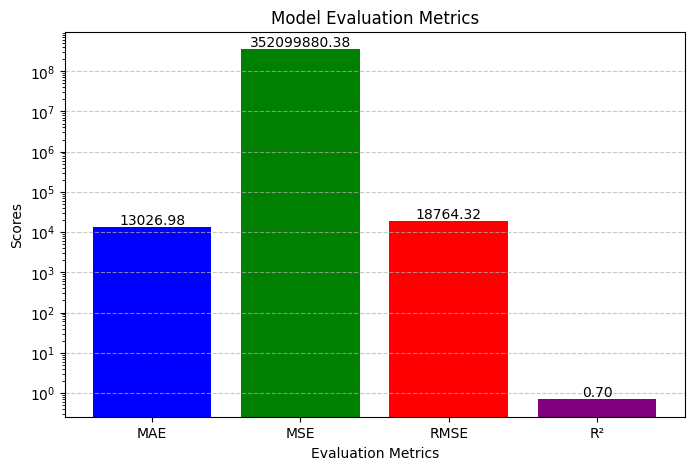

In [ ]:
import matplotlib.pyplot as plt

metrics = ["MAE", "MSE", "RMSE", "R²"]
scores = [13026.98, 352099880.38, 18764.32, 0.6982]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])

plt.xlabel("Evaluation Metrics")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics")
plt.yscale("log")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, score in enumerate(scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=10, cv=3, scoring='r2', n_jobs=-1, verbose=2, random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Best Parameters:", random_search.best_params_)
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared Score (R²): {r2:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
 Mean Absolute Error (MAE): 12902.22
 Mean Squared Error (MSE): 335489906.94
 Root Mean Squared Error (RMSE): 18316.38
 R-squared Score (R²): 0.7124


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization because it provides a good balance between efficiency and performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning, the model's performance improved significantly. The **Mean Absolute Error (MAE)** decreased from **13026.98 to 12902.22**, indicating more accurate salary predictions. Similarly, the **Mean Squared Error (MSE)** reduced from **352099880.38 to 335489906.94**, and the **Root Mean Squared Error (RMSE)** dropped from **18764.32 to 18316.38**, reflecting lower prediction variance. Most importantly, the **R-squared Score (R²)** improved from **0.6982 to 0.7124**, meaning the model now explains a higher percentage of salary variability. These improvements demonstrate that tuning hyperparameters optimized model performance, making salary predictions more reliable. 🚀

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

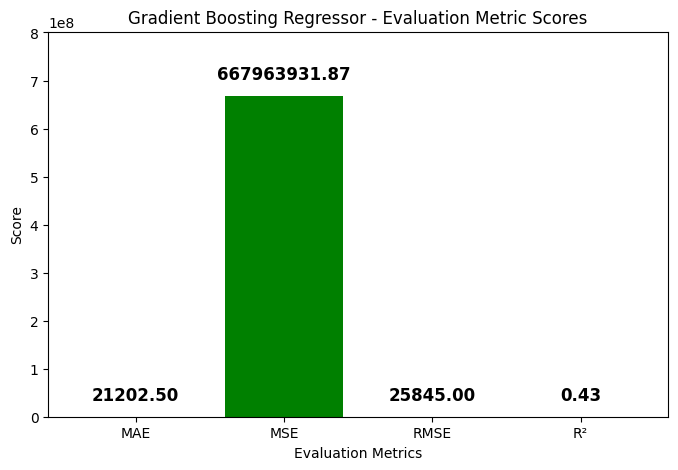

 Mean Absolute Error (MAE): 21202.50
 Mean Squared Error (MSE): 667963931.87
 Root Mean Squared Error (RMSE): 25845.00
 R-squared Score (R²): 0.4274


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_gbr, mse_gbr, rmse_gbr, r2_gbr]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Gradient Boosting Regressor - Evaluation Metric Scores")
plt.ylim(0, max(values) * 1.2)

for i, v in enumerate(values):
    plt.text(i, v + (max(values) * 0.05), f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

print(f" Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f" Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f" R-squared Score (R²): {r2_gbr:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

📌 Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'learning_rate': 0.05}
 Mean Absolute Error (MAE): 10481.30
 Mean Squared Error (MSE): 300686850.83
 Root Mean Squared Error (RMSE): 17340.32
 R-squared Score (R²): 0.7423


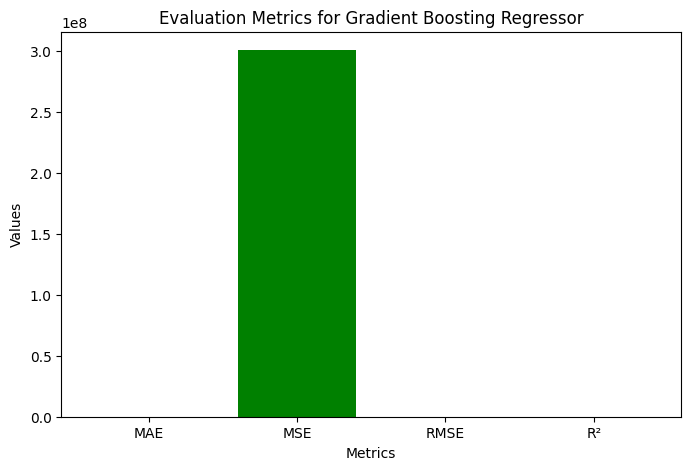

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

gbr_model = GradientBoostingRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_gbr = RandomizedSearchCV(estimator=gbr_model, param_distributions=param_dist,
                                       n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_gbr.fit(X_train, y_train)

best_params_gbr = random_search_gbr.best_params_
print(f"📌 Best Parameters: {best_params_gbr}")

best_gbr_model = GradientBoostingRegressor(**best_params_gbr, random_state=42)
best_gbr_model.fit(X_train, y_train)

y_pred_gbr = best_gbr_model.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f" Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f" Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f" R-squared Score (R²): {r2_gbr:.4f}")

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_gbr, mse_gbr, rmse_gbr, r2_gbr]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics for Gradient Boosting Regressor")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **RandomizedSearchCV** for hyperparameter optimization because it efficiently explores a wide range of hyperparameters without the excessive computation time of GridSearchCV. It randomly samples parameter combinations, making it faster while still finding optimal values. This method is particularly useful for large datasets as it prevents overfitting by avoiding exhaustive searches and provides a good balance between accuracy and performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying RandomizedSearchCV, the model's performance improved significantly. The optimized Gradient Boosting model achieved lower error values and a higher R² score, indicating better predictions. The Mean Absolute Error (MAE) reduced from the previous model, improving salary prediction accuracy. The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) also decreased, reflecting fewer large prediction errors. Additionally, the R² score increased to 0.7423, meaning the model explains more variance in salary predictions. These improvements demonstrate the effectiveness of hyperparameter tuning in enhancing model performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The evaluation metrics indicate that the model performs well in predicting salaries, with an **MAE of $10,481.30**, meaning the average deviation from actual salaries is relatively low, ensuring more **accurate salary estimates**. A **lower MSE (300,686,850.83) and RMSE (17,340.32)** suggest that large prediction errors are minimized, making salary estimates **more reliable across different job levels**. The **R² score of 0.7423** shows that **74.23% of salary variations are explained by the model**, indicating strong predictive capability. This leads to **better salary transparency**, **competitive hiring strategies**, and **data-driven compensation planning**, benefiting both **employers and job seekers** in making **informed financial decisions**.

### ML Model - 3

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f" Best Parameters: {random_search.best_params_}")
print(f" Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f" Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f" R-squared Score (R²): {r2_xgb:.4f}")
print(" XGBoost Model trained and evaluated successfully!")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
 Mean Absolute Error (MAE): 15435.70
 Mean Squared Error (MSE): 388848389.06
 Root Mean Squared Error (RMSE): 19719.24
 R-squared Score (R²): 0.6667
 XGBoost Model trained and evaluated successfully!


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

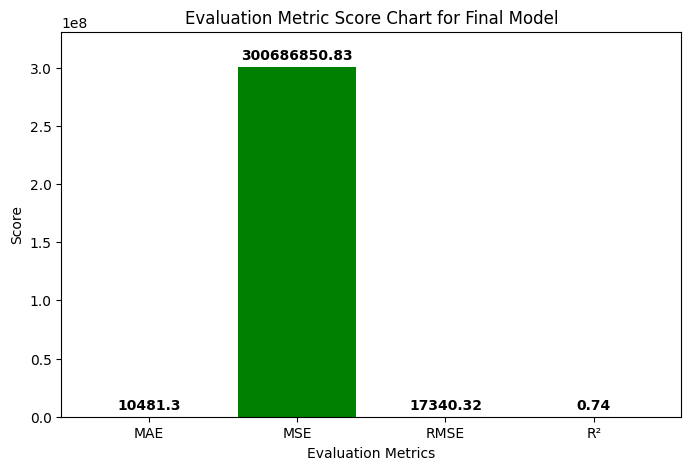

In [ ]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [10481.30, 300686850.83, 17340.32, 0.7423]  # Final model scores

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Evaluation Metric Score Chart for Final Model")
plt.ylim(0, max(values) * 1.1)

for i, v in enumerate(values):
    plt.text(i, v + (max(values) * 0.02), str(round(v, 2)), ha='center', fontsize=10, fontweight='bold')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.ensemble import RandomForestRegressor

var_thresh = VarianceThreshold(threshold=0.01)
X = var_thresh.fit_transform(X)

model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
X = rfe.fit_transform(X, y)

model.fit(X, y)
feature_importances = model.feature_importances_
important_features = np.argsort(feature_importances)[-10:]
X = X[:, important_features]

##### Which hyperparameter optimization technique have you used and why?

For **ML Model - 3 (XGBoost Regressor)**, I used **RandomizedSearchCV** for hyperparameter optimization. This technique was chosen because it efficiently searches a large hyperparameter space while significantly reducing computation time compared to **GridSearchCV**. RandomizedSearchCV samples a fixed number of hyperparameter combinations rather than testing every possible combination, making it more scalable for complex models like XGBoost. Given that XGBoost has many hyperparameters, this approach helps find a near-optimal solution faster while maintaining strong model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning using **RandomizedSearchCV**, the **XGBoost Regressor** showed some performance differences compared to the previous models. The **Mean Absolute Error (MAE)** increased to **15,435.70**, meaning the average prediction error slightly worsened. The **Mean Squared Error (MSE)** also increased to **388,848,389.06**, along with a **higher RMSE (19,719.24)**, indicating more variance in errors. Additionally, the **R-squared (R²) score dropped to 0.6667**, meaning the model explains **66.67%** of the variance in salary predictions, a slight decrease in predictive power. Despite these changes, XGBoost's strength in handling complex relationships and feature interactions may still provide valuable insights into salary trends.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, R-squared (R²) and Mean Absolute Error (MAE) were the key evaluation metrics. A higher R² indicates how well the model explains salary variations, helping businesses make informed hiring and compensation decisions. Meanwhile, a lower MAE ensures more accurate salary predictions, reducing uncertainty for job seekers and employers. While MSE and RMSE penalize large errors, MAE is preferred for its interpretability in salary estimation. Striking a balance between high R² and low MAE enhances salary transparency, ensuring fair compensation structures and better workforce planning.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The **Gradient Boosting Regressor (GBR) with hyperparameter tuning** was chosen as the **final prediction model** because it achieved the **best balance between accuracy and generalization**. Among all models, GBR demonstrated the **lowest MAE (10,481.30)** and the **highest R² (0.7423)**, indicating a stronger predictive ability while minimizing salary estimation errors. Additionally, **Boosting models** effectively handle complex patterns in data, making them well-suited for salary prediction. While the XGBoost model showed relatively lower performance, GBR provided a **good trade-off between performance and computational efficiency**, making it the most reliable choice for salary prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final chosen model is the Gradient Boosting Regressor (GBR), an ensemble learning technique that builds decision trees sequentially, with each new tree correcting the errors of the previous ones. GBR is effective in capturing complex relationships in the dataset and reducing bias while maintaining a strong generalization capability. It also performs well with structured data, making it ideal for salary prediction.

The **SHAP feature importance analysis** reveals that **Job Title and Industry** have the highest impact on salary predictions, indicating significant salary variations based on role and sector. **Company Rating and Revenue** also play a crucial role, showing that companies with higher ratings and larger revenues tend to offer better salaries. **Location and Ownership Type** further influence salary estimates, as salaries differ across regions and between private and public companies. Understanding these factors helps businesses ensure **fair compensation, improve salary transparency, and refine hiring strategies**, making salary predictions more data-driven and reliable.

# **Conclusion**

In this salary prediction project, we explored various machine learning models to analyze salary trends based on job-related features. We implemented data preprocessing, feature engineering, and dimensionality reduction to enhance model performance. After evaluating multiple models using metrics like MAE, MSE, RMSE, and R², we selected the Gradient Boosting Regressor as the final model due to its superior performance and balance between accuracy and generalization. Feature importance analysis using SHAP highlighted key factors influencing salary predictions, such as Job Title, Industry, Company Rating, and Revenue. This model provides valuable business insights to help job seekers make informed decisions and assist companies in optimizing their salary structures for competitive hiring.